
# Project: Investigation of TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset to analyse is the [TMDb Movies Dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv), which gives an insight of different variables like the popularity or budget from more than 10.000 different movies.

Questions to ask:
- Does the number of released movies increase during the years?
- Does the mean budget of the movies increase during time?
- Is the popularity of the movies dependent on the budget?
- Which is the most popular movie?
- Which is the least popular movie?
- How is the popularity of older movies (<1990) compared to newer movies (>=1990)?
- Which genre occurs most?
- Which genre is the most popular?
- Which genre made the highest profit?
- Which genre got the highest mean runtime?

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Import the data set
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Get Info about the columns (e.g. missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Observation:
The dataset consists of 10866 entries with a total of 21 columns. There are missing values for the imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies. There are different datatypes like float, int and object. The release date is in string format, which needs to be fixed.

In [4]:
# Get the percentage of missing values for each column
# If there are too many missing values, the column can be dropped

df.isna().sum()/df.shape[0]

id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006994
homepage                0.729799
director                0.004049
tagline                 0.259893
keywords                0.137401
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094791
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

#### Observation
Some columns contain many missing values and need to be dropped. To answer the questions above we don't need to keep the column 'homepage' and 'tagline'. Maybe there are also too many missing values for the 'keywords' and 'production_companies'

In [5]:
# Count the number where 'keywords' and 'production_companies' have missing values 
len(df[(df['keywords'].isna()) & (df['production_companies'].isna())])

363

Since there are just 363 entries with both values missing I decided to keep them. Also because we don't want to drop too much data.

In [6]:
# Check if there are any duplicates
print('Number of duplicates: ', sum(df.duplicated()))

# Because there is only one duplicate, we can print it out
df[df['id'].duplicated() == True]

Number of duplicates:  1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Observation
The observed duplicate needs to be dropped.

In [7]:
# Get some statistical information about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observation

There is no currency or unit for the budget or revenue and many values are at 0. Research on some movies shows that these 0 entries had a budget and revenue, maybe these entries were just missing or not recorded. 

In [8]:
# Count the number of 0-values in budget and revenue

print("Percentage of 0-values in budget: ", len(df.query('budget==0'))/df.shape[0])
print("Percentage of 0-values in revenue: ", len(df.query('revenue==0'))/df.shape[0])
print("Percentage of 0-values in budget and revenue: ", len(df.query('budget==0 & revenue==0'))/df.shape[0])


Percentage of 0-values in budget:  0.5242039388919566
Percentage of 0-values in revenue:  0.5536535983802687
Percentage of 0-values in budget and revenue:  0.4326339039204859


The percentages of 0-values in budget and revenue are pretty high, but we cannot drop this data or count the impact of these entries with respect to the profit. So I decided to change the 0 to nan that these entries are not considered for the profit.

There is also a big span between the runtime of the movies (0-900). 

In [9]:
# Which film has a runtime of 900 minutes?
df.query('runtime == 900')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


Information of the Internet has shown that the runtime is in minutes and some movies with genre 'documentary' last many hours.
Because there are just a few 0-values in 'runtime', we can drop these. 

In [10]:
# Count number of entries with runtime=0 
print("Number of entries with runtime=0: ", len(df.query('runtime == 0')))

Number of entries with runtime=0:  31


### Data Cleaning 
This step contains the removing or adjusting of errant data observerd from the previous steps.

To Do:
- Handle missing values
- Drop duplicate values
- Handle 0-values
- Drop useless columns in terms of the questions
- Change the format of release date to DateTime
- Give an overview of the data
    

#### Handle missing values

In [11]:
# Drop the columns 'homepage' and 'tagline'
df_cleaned = df.drop(['homepage', 'tagline'], 1)

#### Drop duplicates

In [12]:
# Drops the observed duplicate
df_cleaned.drop_duplicates(inplace=True)

#### Handle 0-values

In [13]:
# Replacing budget and revenue with nan
df_cleaned['budget'].replace(0, np.nan, inplace=True)
df_cleaned['revenue'].replace(0, np.nan, inplace=True)

# Drop entries with runtime = 0
df_cleaned.query('runtime > 0', inplace = True)

#### Drop useless columns in terms of the questions
To answer the questions we don't need to keep useless columns, so just drop them.

In [14]:
# Drop unused columns
df_cleaned = df_cleaned.drop(['cast', 'imdb_id', 'director', 'production_companies', 'overview', 
                              'vote_average', 'budget_adj', 'revenue_adj', 'keywords'], 1)

#### Change the format of release date to DateTime

In [15]:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])

#### Overview of the adjusted data

In [16]:
df_cleaned.head(3)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10834 non-null  int64         
 1   popularity      10834 non-null  float64       
 2   budget          5166 non-null   float64       
 3   revenue         4849 non-null   float64       
 4   original_title  10834 non-null  object        
 5   runtime         10834 non-null  int64         
 6   genres          10812 non-null  object        
 7   release_date    10834 non-null  datetime64[ns]
 8   vote_count      10834 non-null  int64         
 9   release_year    10834 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 931.0+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Does the number of released movies increase during the years?

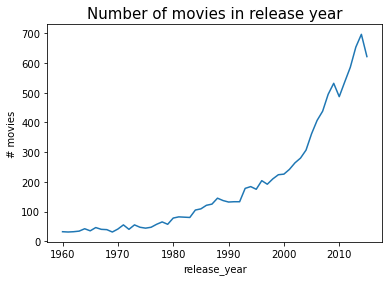

In [18]:
# Set the title and axis
plt.title("Number of movies in release year",fontsize = 15)
plt.ylabel('# movies')

# Plot the number of movies with respect to the release year
df_cleaned.groupby('release_year')['id'].count().plot();

#### Conclusion 1
The number of movies increases per year most of the time. While the highest value was 2014, the lowest value was back in 1960.

### Question 2: Does the mean budget of the movies increase during time?

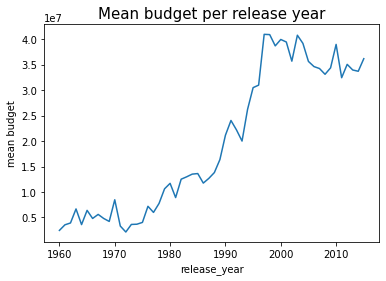

In [19]:
# Set the title and axis
plt.title("Mean budget per release year",fontsize = 15)
plt.ylabel('mean budget')

# Plot the mean budget with respect to the release year
df_cleaned.groupby('release_year')['budget'].mean().plot();

#### Conclusion 2
The mean budget of the movies increases up to the 2000s. After that it slightly decreases.

### Question 3: Is the popularity of the movies dependent on the budget?

Correlation of popularity and budget :  0.4798502168144185


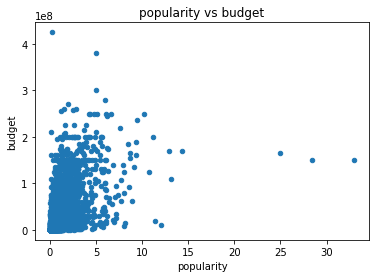

In [20]:
# Plot the popularity vs the budget
df_cleaned.plot(x='popularity', y='budget', kind='scatter', title='popularity vs budget');

# Compute the correlation
data_corr = df_cleaned.corr()
print("Correlation of popularity and budget : ",data_corr.loc['popularity','budget'])

#### Conclusion 3
There is a small dependency between the popularity and the budget. Movies created with a higher budget could be more popular.

### Question 4: Which is the most popular movie?

In [21]:
# Get the most popular movie
df_cleaned.query('popularity == popularity.max()')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015


#### Conclusion 4
The most popular movie is "Jurassic World", released in 2015, with a vote_count of 5562.

### Question 5: Which is the least popular movie?

In [22]:
# Get the less popular movie
df_cleaned.query('popularity == popularity.min()')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year
6181,18729,0.000065,NaN,NaN,"North and South, Book I",561,Drama|History|Western,1985-11-03,17,1985


#### Conclusion 5
The least popular movie is "North and South, Book I", released in 1985, with a vote_count of 17. 

### Question 6: How is the popularity of older movies (<1990) compared to newer movies (>=1990)

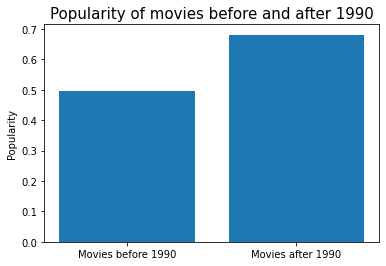

In [23]:
# Split the dataframe into old and new movies
df_old = df_cleaned.query('release_year < 1990')
df_new = df_cleaned.query('release_year >= 1990')

# Plot the mean of the popularities as bar chart
plt.ylabel('Popularity')
plt.title('Popularity of movies before and after 1990',fontsize = 15)
plt.bar([1,2], [df_old['popularity'].mean(),df_new['popularity'].mean()], 
        tick_label = ['Movies before 1990', 'Movies after 1990']);

Next we need to calculate how many votes the movies before and after 1990 got on average to classify the result.

In [24]:
# Calculate mean votes of old and new movies
print("Mean votes of old movies:", df_old['vote_count'].mean())
print("Mean votes of new movies:", df_new['vote_count'].mean())

Mean votes of old movies: 109.5644076564925
Mean votes of new movies: 241.5024154589372


#### Conclusion 6
Movies published after 1990 seem to be more popular, but also received more than twice as many votes on average.

### Question 7: Which genre occurs most often?

In [25]:
# Count the number of different genres
df_cleaned.groupby('genres').count()['id']#.plot(kind='pie')

genres
Action                                      63
Action|Adventure                            15
Action|Adventure|Animation                   4
Action|Adventure|Animation|Comedy|Drama      1
Action|Adventure|Animation|Comedy|Family     1
                                            ..
Western|Drama|Crime|Romance                  1
Western|History                              1
Western|History|War                          1
Western|Horror|Thriller                      1
Western|Thriller                             1
Name: id, Length: 2036, dtype: int64

Wow, there are over 2000 different "mixed" genres. Thus, we want a single genre and need to take a deeper look, because the searched genre could also be hided in many mixed genres.
So we first need to split the entries in the 'genres' column and create a new row for every entry respective to the genre.

In [26]:
# Split the entries and create new column 'genre'
df_genre = df_cleaned.assign(genre=df['genres'].str.split('|')).explode('genre')

# Drop the old 'genres' column
df_genre = df_genre.drop('genres', 1)

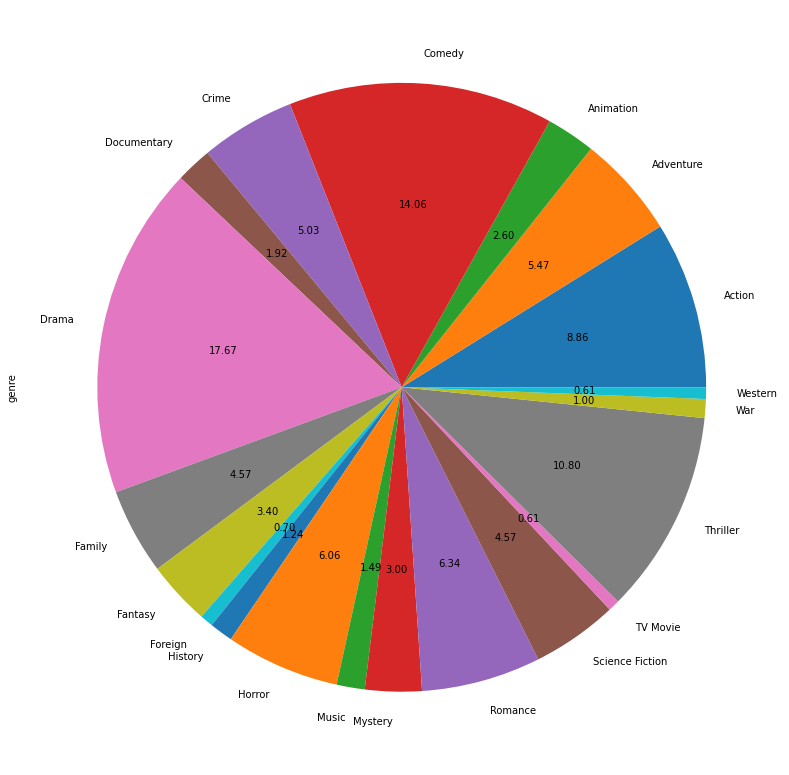

In [27]:
# Group the data by genre and count
df_genre.groupby('genre')['genre'].count().plot(kind='pie', figsize=(14,14), autopct='%.2f');

#### Conclusion 7
With 17.66% of all movies the 'Drama' genre occurs most often.

### Question 8: Which genre is the most popular?

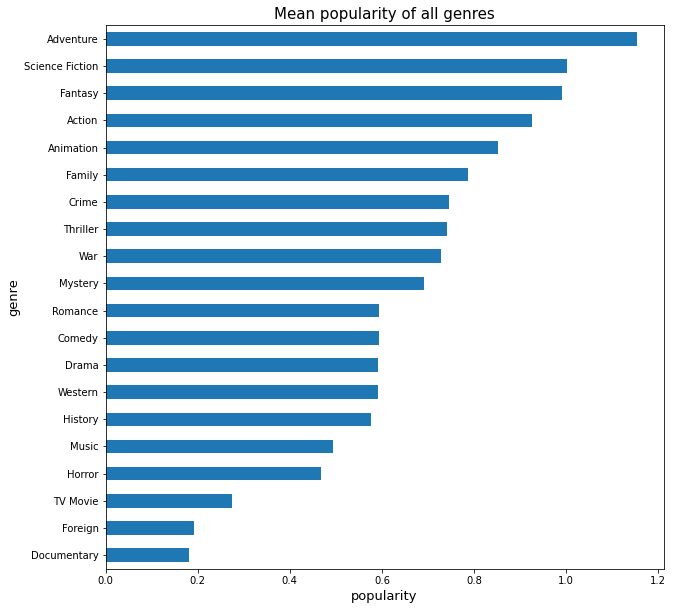

In [28]:
# Set the title and axis
plt.title('Mean popularity of all genres', fontsize = 15)
plt.xlabel('popularity', fontsize = 13)
plt.ylabel('genre', fontsize = 13)

# Plot the mean popularity of all genres
df_genre.groupby('genre')['popularity'].mean().sort_values().plot(kind='barh', figsize=(10,10));

#### Conclusion 8
The most popular genre is 'Adventure'.

### Question 9: Which genre made the highest profit?

In [29]:
# Create new column 'profit'
df_genre['profit'] = df_genre['revenue']-df_genre['budget']

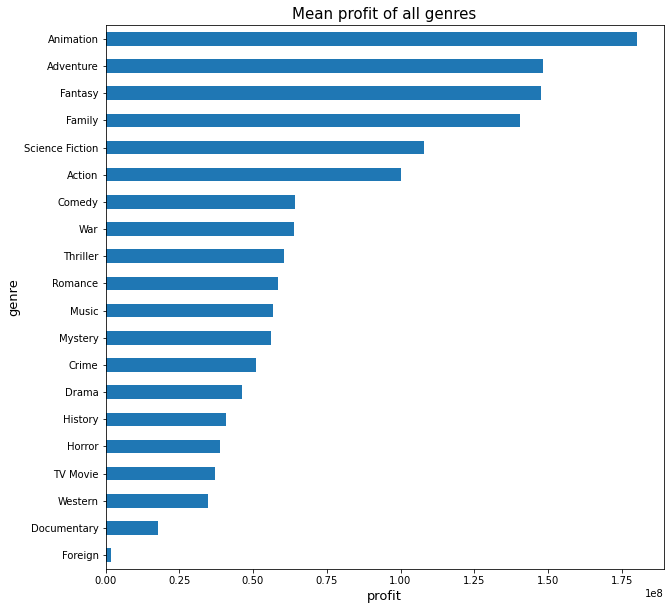

In [30]:
# Set the title and axis
plt.title('Mean profit of all genres', fontsize = 15)
plt.xlabel('profit', fontsize = 13)
plt.ylabel('genre', fontsize = 13)

# Plot the mean profit of all genres
df_genre.groupby('genre')['profit'].mean().sort_values().plot(kind='barh', figsize=(10,10));

#### Conclusion 9
The genre 'Animation' is the most profitable.

### Question 10: Which genre got the highest mean runtime?

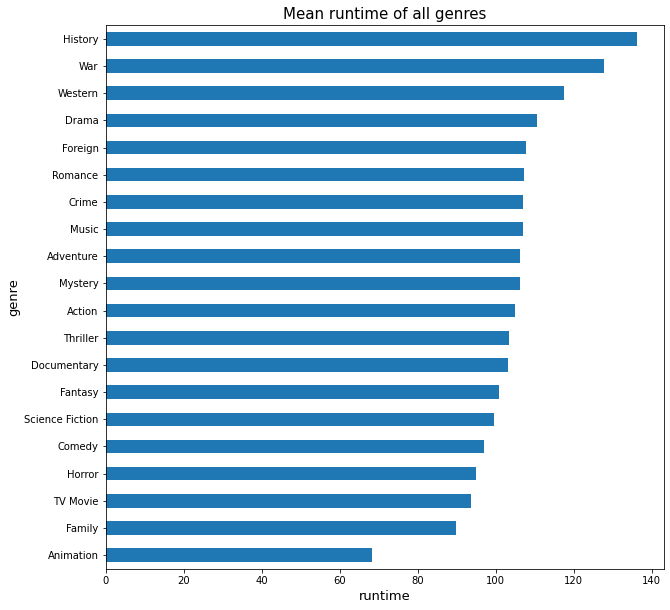

In [31]:
# Set the title and axis
plt.title('Mean runtime of all genres', fontsize = 15)
plt.xlabel('runtime', fontsize = 13)
plt.ylabel('genre', fontsize = 13)

# Plot the mean runtime of all genres
df_genre.groupby('genre')['runtime'].mean().sort_values().plot(kind='barh', figsize=(10,10));

#### Conclusion 10
The mean runtime of the 'History' genre is the highest, followed by 'War' and 'Western'.

<a id='conclusions'></a>
## Conclusions

- The number of movies increases per year the most time. More technical possibilities and the interest in movies seem to be the cause. Besides the mean budget for movies also increased up to the 2000s.
- A high budget does not always mean that the movie is going to be popular, but it seems to be a good indicator. Eventually you have to make something out of the money.
- The most popular movie is "Jurassic World", released in 2015.
- The less popular movie is "North and South, Book I", released in 1985.
- Movies published after 1990 seem to be more popular and therefore also received more than twice as many votes on average.
- With 17.66% of all movies the 'Drama' genre occurs most often and is part of many movies.
- The most popular genre 'Adventure' is nearly as twice as popular as the 'Drama' genre.
- The most profitable genre is 'Animation'. A possible reason is that there's less money needed to pay actors etc.
- The mean runtime of the 'History' genre is the highest, followed by 'War' and 'Western'. Whereas the animated films are very short. Maybe because that's better for children. 